In [19]:
import json
# Reading the lstm_evaluation_metrics_file
root_path = "/Users/ybatash/Workspace/tau.ac.il/tau-final-project/data/trained_models"

evaluation_metrics_files = [
    f"{root_path}/1_min/09_09_2025_15_55/lstm_evaluation_metrics.json",
    f"{root_path}/5_min/09_09_2025_16_31/lstm_evaluation_metrics.json",
    f"{root_path}/15_min/09_09_2025_16_36/lstm_evaluation_metrics.json"
]

evaluation_metrics = []

for file in evaluation_metrics_files:   
    try:
        with open(file, 'r') as json_file:
            evaluation_metrics.append(json.load(json_file))
    #     print("\nData read back from file:")
    #     print(loaded_data)
    except IOError as e:
        print(f"Error reading from file {lstm_evaluation_metrics_file_name}: {e}")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from file {lstm_evaluation_metrics_file_name}: {e}")


In [30]:
final_evaluation_metrics = []

for item in evaluation_metrics:
    tmp = {}
    for old_key, value in item.items():
        new_key = old_key.replace(" ", "_")
        if type(value) == dict:
            sub_tmp={}
            for key, val in value.items():
                n_key = key.replace(" ", "_")
                sub_tmp[n_key] = val
            value = sub_tmp
        tmp[new_key] = value
    final_evaluation_metrics.append(tmp)


In [31]:
final_evaluation_metrics

[{'Data_Resolution': '1min',
  'Prediction_Accuracy': {'MAE': 0.09867932945725828,
   'RMSE': 0.16562638131623242,
   'Directional_Accuracy': '44.41%'},
  'Trading_Simulation': {'Initial_Capital': '$10,000.00',
   'Final_Portfolio_Value': '$11,043.72',
   'Cumulative_Return': '10.44%',
   'Sharpe_Ratio_(Annualized)': '2.246',
   'Maximum_Drawdown': '-4.54%',
   'Total_Trades': 114,
   'BUY_signals': 59,
   'SELL_signals': 55,
   'HOLD_periods': 47090,
   'Win_Rate': '100.0%'},
  'Computational_Efficiency': {'Training_Time': '2367.26 seconds',
   'Average_Inference_Time': '0.1412 ms/prediction',
   'Total_Predictions_Made': '47,204'}},
 {'Data_Resolution': '5min',
  'Prediction_Accuracy': {'MAE': 0.2334036729739691,
   'RMSE': 0.3630315224767699,
   'Directional_Accuracy': '47.01%'},
  'Trading_Simulation': {'Initial_Capital': '$10,000.00',
   'Final_Portfolio_Value': '$10,728.47',
   'Cumulative_Return': '7.28%',
   'Sharpe_Ratio_(Annualized)': '3.068',
   'Maximum_Drawdown': '-7.42%',

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the list of dictionaries into a flattened DataFrame for easier analysis
# We need to flatten the nested dictionaries first
flattened_data = []
for entry in final_evaluation_metrics:
    flat_entry = {'Data_Resolution': entry['Data_Resolution']}
    for category, metrics in entry.items():
        if category != 'Data_Resolution':
            if isinstance(metrics, dict):
                for metric_name, value in metrics.items():
                    # Clean up some string values for numerical comparison
                    if isinstance(value, str):
                        if '%' in value:
                            value = float(value.replace('%', '').replace(',', '')) / 100
                        elif '$' in value:
                            value = float(value.replace('$', '').replace(',', ''))
                        elif 'seconds' in value:
                            value = float(value.replace(' seconds', ''))
                        elif 'ms/prediction' in value:
                            value = float(value.replace(' ms/prediction', ''))
                        elif ',' in value:
                            value = float(value.replace(',', ''))
                        else:
                            try:
                                value = float(value) # Try converting other numbers
                            except ValueError:
                                pass # Keep as string if it can't be converted
                    flat_entry[f'{category}_{metric_name.replace(" ", "_")}'] = value
            else:
                flat_entry[category] = metrics
    flattened_data.append(flat_entry)

df = pd.DataFrame(flattened_data)

# Set 'Data Resolution' as index for easier lookup if preferred, or keep as column
df_indexed = df.set_index('Data_Resolution')

# print("## Raw Data (Flattened DataFrame):")
# display(df) # In a Jupyter Notebook, 'display' shows a formatted table

# print("\n## Data Info:")
# df.info()

# --- Cell 2: Overview of All Metrics ---
print("\n# --- Overview of All Metrics ---")

print("## Full Metrics Table:")
display(df_indexed)

# You can also use df.T to transpose and see metrics as rows
print("\n## Transposed Metrics Table (useful for comparing specific metrics across resolutions):")
display(df_indexed.T)




# --- Overview of All Metrics ---
## Full Metrics Table:


,Prediction_Accuracy_MAE,Prediction_Accuracy_RMSE,Prediction_Accuracy_Directional_Accuracy,Trading_Simulation_Initial_Capital,Trading_Simulation_Final_Portfolio_Value,Trading_Simulation_Cumulative_Return,Trading_Simulation_Sharpe_Ratio_(Annualized),Trading_Simulation_Maximum_Drawdown,Trading_Simulation_Total_Trades,Trading_Simulation_BUY_signals,Trading_Simulation_SELL_signals,Trading_Simulation_HOLD_periods,Trading_Simulation_Win_Rate,Computational_Efficiency_Training_Time,Computational_Efficiency_Average_Inference_Time,Computational_Efficiency_Total_Predictions_Made
Data_Resolution,,,,,,,,,,,,,,,,
1min,0.098679,0.165626,0.4441,10000.0,11043.72,0.1044,2.246,-0.0454,114,59,55,47090,1.0,2367.26,0.1412,47204.0
5min,0.233404,0.363032,0.4701,10000.0,10728.47,0.0728,3.068,-0.0742,254,172,82,10177,1.0,670.15,0.1673,10431.0
15min,0.391425,0.614139,0.4664,10000.0,10370.89,0.0371,3.203,-0.0567,358,214,144,3125,1.0,301.82,0.2216,3483.0



## Transposed Metrics Table (useful for comparing specific metrics across resolutions):


Data_Resolution,1min,5min,15min
Prediction_Accuracy_MAE,0.098679,0.233404,0.391425
Prediction_Accuracy_RMSE,0.165626,0.363032,0.614139
Prediction_Accuracy_Directional_Accuracy,0.444100,0.470100,0.466400
Trading_Simulation_Initial_Capital,10000.000000,10000.000000,10000.000000
Trading_Simulation_Final_Portfolio_Value,11043.720000,10728.470000,10370.890000
Trading_Simulation_Cumulative_Return,0.104400,0.072800,0.037100
Trading_Simulation_Sharpe_Ratio_(Annualized),2.246000,3.068000,3.203000
Trading_Simulation_Maximum_Drawdown,-0.045400,-0.074200,-0.056700
Trading_Simulation_Total_Trades,114.000000,254.000000,358.000000
Trading_Simulation_BUY_signals,59.000000,172.000000,214.000000



# --- Prediction Accuracy Comparison ---
## Prediction Accuracy Metrics:


,Prediction_Accuracy_MAE,Prediction_Accuracy_RMSE,Prediction_Accuracy_Directional_Accuracy
Data_Resolution,,,
1min,0.098679,0.165626,0.4441
5min,0.233404,0.363032,0.4701
15min,0.391425,0.614139,0.4664


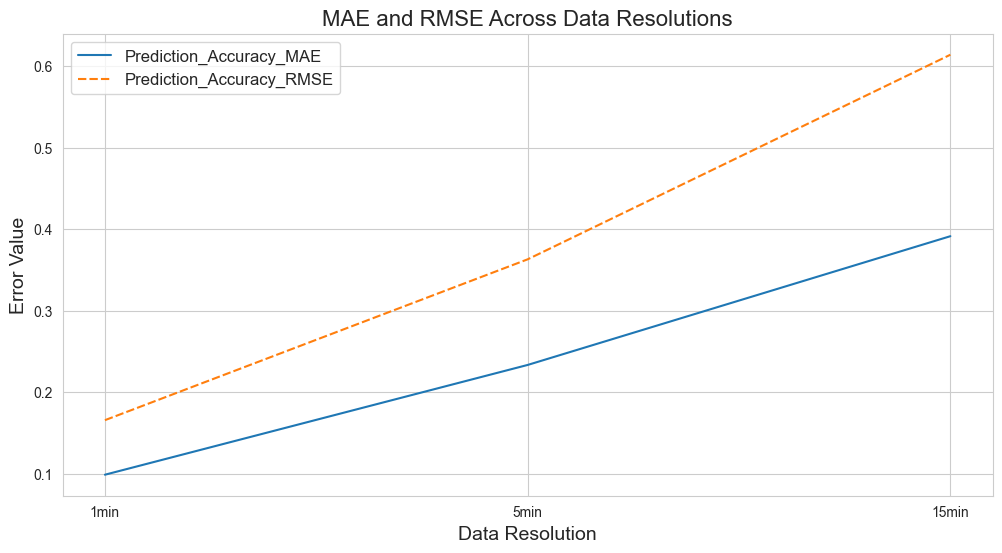

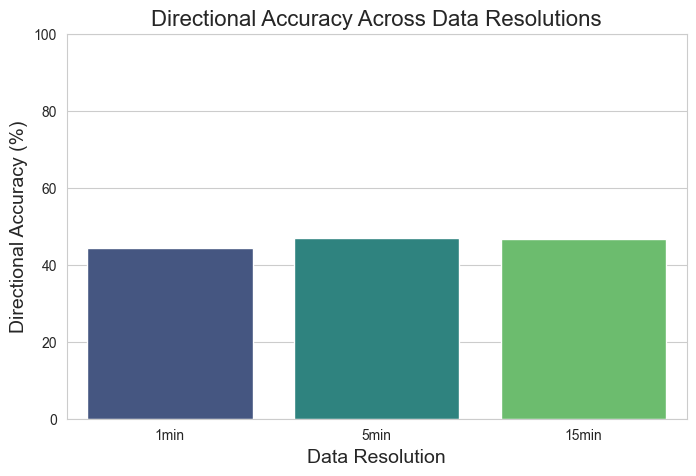

In [35]:
# --- Cell 3: Prediction Accuracy Comparison ---
print("\n# --- Prediction Accuracy Comparison ---")

accuracy_cols = [col for col in df.columns if 'Prediction_Accuracy' in col]
accuracy_df = df[['Data_Resolution'] + accuracy_cols].set_index('Data_Resolution')

print("## Prediction Accuracy Metrics:")
display(accuracy_df)

plt.figure(figsize=(12, 6))
sns.lineplot(data=accuracy_df[['Prediction_Accuracy_MAE', 'Prediction_Accuracy_RMSE']])
plt.title('MAE and RMSE Across Data Resolutions')
plt.ylabel('Error Value')
plt.xlabel('Data Resolution')
plt.grid(True)
plt.show()

# Directional Accuracy (need to convert back to percentage string for display if needed)
directional_accuracy = accuracy_df['Prediction_Accuracy_Directional_Accuracy'] * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=directional_accuracy.index, y=directional_accuracy.values, palette='viridis')
plt.title('Directional Accuracy Across Data Resolutions')
plt.ylabel('Directional Accuracy (%)')
plt.xlabel('Data Resolution')
plt.ylim(0, 100)
plt.show()
print("\n") # For spacing



# --- Trading Simulation Comparison ---
## Trading Simulation Metrics:


,Trading_Simulation_Initial_Capital,Trading_Simulation_Final_Portfolio_Value,Trading_Simulation_Cumulative_Return,Trading_Simulation_Sharpe_Ratio_(Annualized),Trading_Simulation_Maximum_Drawdown,Trading_Simulation_Total_Trades,Trading_Simulation_BUY_signals,Trading_Simulation_SELL_signals,Trading_Simulation_HOLD_periods,Trading_Simulation_Win_Rate
Data_Resolution,,,,,,,,,,
1min,10000.0,11043.72,0.1044,2.246,-0.0454,114,59,55,47090,1.0
5min,10000.0,10728.47,0.0728,3.068,-0.0742,254,172,82,10177,1.0
15min,10000.0,10370.89,0.0371,3.203,-0.0567,358,214,144,3125,1.0


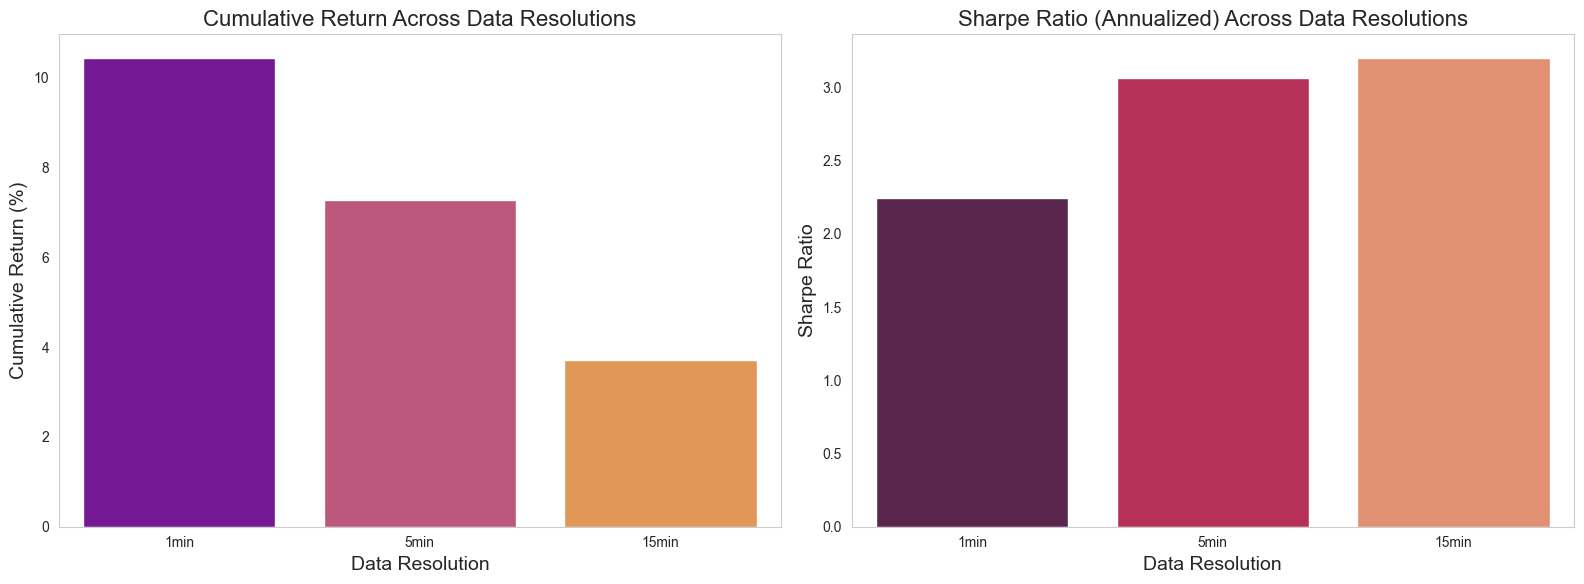

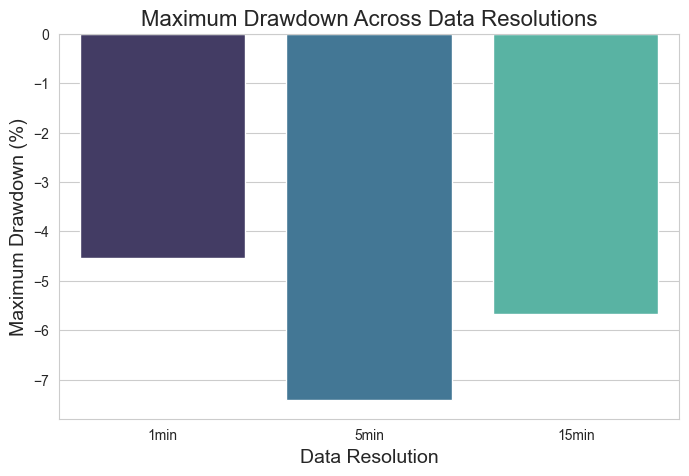

In [37]:
# --- Cell 4: Trading Simulation Comparison ---
print("# --- Trading Simulation Comparison ---")

trading_cols = [col for col in df.columns if 'Trading_Simulation' in col]
trading_df = df[['Data_Resolution'] + trading_cols].set_index('Data_Resolution')

print("## Trading Simulation Metrics:")
display(trading_df)

# Plotting Cumulative Return and Sharpe Ratio
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cumulative_return = trading_df['Trading_Simulation_Cumulative_Return'] * 100
sns.barplot(x=cumulative_return.index, y=cumulative_return.values, ax=axes[0], palette='plasma')
axes[0].set_title('Cumulative Return Across Data Resolutions')
axes[0].set_ylabel('Cumulative Return (%)')
axes[0].set_xlabel('Data Resolution')
axes[0].grid(axis='y')

sharpe_ratio = trading_df['Trading_Simulation_Sharpe_Ratio_(Annualized)']
sns.barplot(x=sharpe_ratio.index, y=sharpe_ratio.values, ax=axes[1], palette='rocket')
axes[1].set_title('Sharpe Ratio (Annualized) Across Data Resolutions')
axes[1].set_ylabel('Sharpe Ratio')
axes[1].set_xlabel('Data Resolution')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Maximum Drawdown
max_drawdown = trading_df['Trading_Simulation_Maximum_Drawdown'] * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=max_drawdown.index, y=max_drawdown.values, palette='mako')
plt.title('Maximum Drawdown Across Data Resolutions')
plt.ylabel('Maximum Drawdown (%)')
plt.xlabel('Data Resolution')
plt.show()
print("\n") # For spacing


# --- Computational Efficiency Comparison ---
## Computational Efficiency Metrics:


,Computational_Efficiency_Training_Time,Computational_Efficiency_Average_Inference_Time,Computational_Efficiency_Total_Predictions_Made
Data_Resolution,,,
1min,2367.26,0.1412,47204.0
5min,670.15,0.1673,10431.0
15min,301.82,0.2216,3483.0


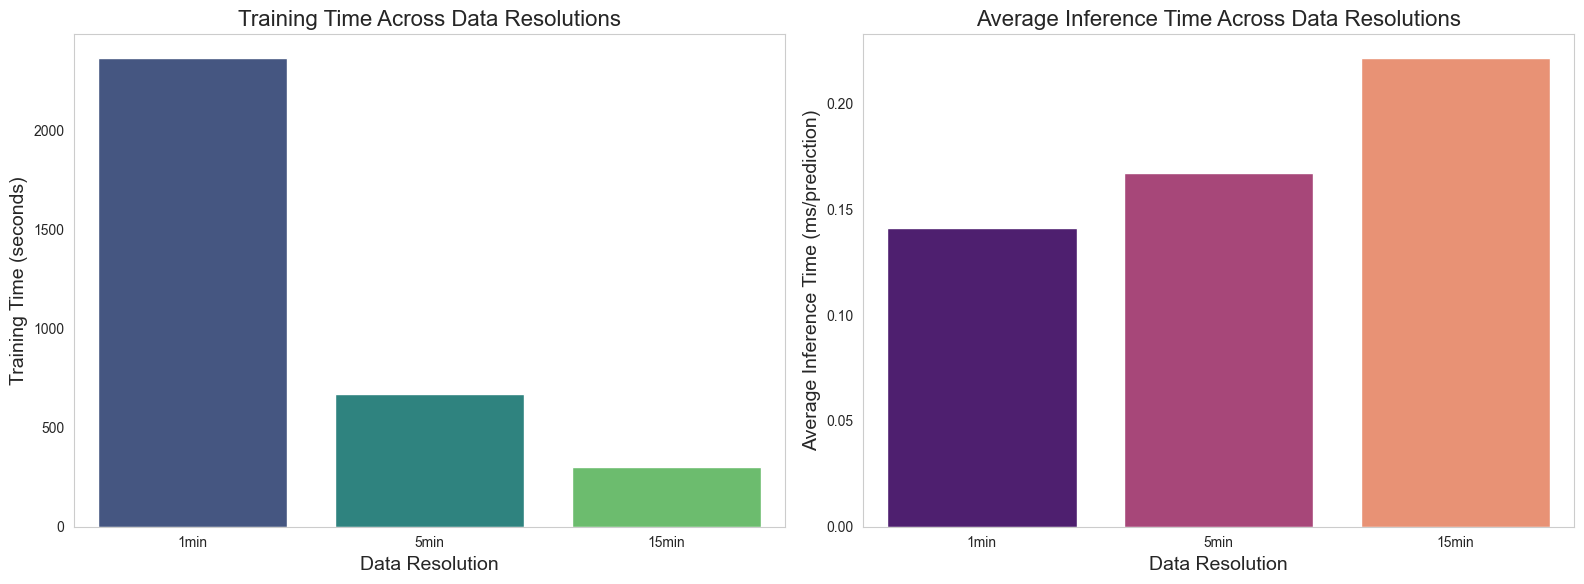

In [38]:
# --- Cell 5: Computational Efficiency Comparison ---
print("# --- Computational Efficiency Comparison ---")

efficiency_cols = [col for col in df.columns if 'Computational_Efficiency' in col]
efficiency_df = df[['Data_Resolution'] + efficiency_cols].set_index('Data_Resolution')

print("## Computational Efficiency Metrics:")
display(efficiency_df)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=efficiency_df.index, y=efficiency_df['Computational_Efficiency_Training_Time'], ax=axes[0], palette='viridis')
axes[0].set_title('Training Time Across Data Resolutions')
axes[0].set_ylabel('Training Time (seconds)')
axes[0].set_xlabel('Data Resolution')
axes[0].grid(axis='y')

sns.barplot(x=efficiency_df.index, y=efficiency_df['Computational_Efficiency_Average_Inference_Time'], ax=axes[1], palette='magma')
axes[1].set_title('Average Inference Time Across Data Resolutions')
axes[1].set_ylabel('Average Inference Time (ms/prediction)')
axes[1].set_xlabel('Data Resolution')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()
print("\n") # For spacing

In [39]:



# --- Cell 6: Overall Summary & Conclusions ---
print("# --- Overall Summary & Conclusions ---")

print("## Key Takeaways:")
print("- **Prediction Accuracy:** Analyze how MAE, RMSE, and Directional Accuracy change with data resolution.")
print("  - *Observation Example:* Lower resolution (e.g., 1min) might show lower MAE/RMSE but not necessarily better directional accuracy.")
print("- **Trading Simulation:** Focus on 'Cumulative Return', 'Sharpe Ratio', and 'Maximum Drawdown'.")
print("  - *Observation Example:* A higher Sharpe Ratio indicates better risk-adjusted returns.")
print("- **Computational Efficiency:** Compare 'Training Time' and 'Average Inference Time'.")
print("  - *Observation Example:* Higher data resolution typically leads to longer training times.")

print("\n## Discussion Points:")
print("1.  Which data resolution offers the best balance across all metrics?")
print("2.  Are there trade-offs (e.g., better accuracy at the cost of higher computation)?")
print("3.  What are the implications for deploying this model in a real-world scenario?")

print("\n## Further Analysis Ideas:")
print("1.  Add statistical tests to compare differences between resolutions.")
print("2.  Normalize metrics to a common scale for direct comparison on a single plot.")
print("3.  Consider adding error bars if you have multiple runs for each resolution.")
print("4.  Interactive plots using libraries like Plotly or Bokeh for deeper exploration.")

# Optional: Generate a concluding image that summarizes the findings
print("\nHere's a conceptual visualization of the trade-offs between accuracy, return, and computational cost for different resolutions.")


# --- Overall Summary & Conclusions ---
## Key Takeaways:
- **Prediction Accuracy:** Analyze how MAE, RMSE, and Directional Accuracy change with data resolution.
  - *Observation Example:* Lower resolution (e.g., 1min) might show lower MAE/RMSE but not necessarily better directional accuracy.
- **Trading Simulation:** Focus on 'Cumulative Return', 'Sharpe Ratio', and 'Maximum Drawdown'.
  - *Observation Example:* A higher Sharpe Ratio indicates better risk-adjusted returns.
- **Computational Efficiency:** Compare 'Training Time' and 'Average Inference Time'.
  - *Observation Example:* Higher data resolution typically leads to longer training times.

## Discussion Points:
1.  Which data resolution offers the best balance across all metrics?
2.  Are there trade-offs (e.g., better accuracy at the cost of higher computation)?
3.  What are the implications for deploying this model in a real-world scenario?

## Further Analysis Ideas:
1.  Add statistical tests to compare differences between 

--- Cell 1: Prediction Accuracy vs. Data_Resolution ---


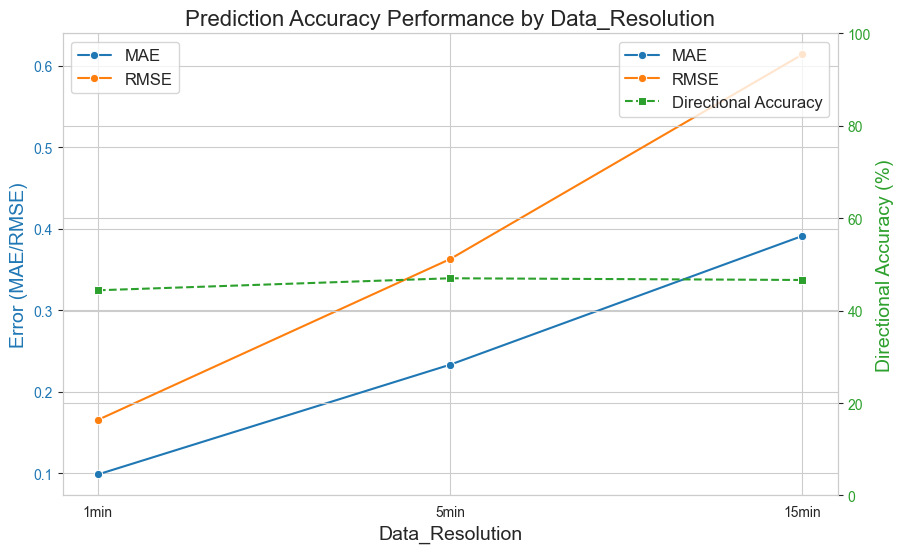

Prediction Accuracy vs. Data_Resolution plot generated.

--- Cell 2: Trading Performance Comparison: Return, Sharpe Ratio, and Max Drawdown ---


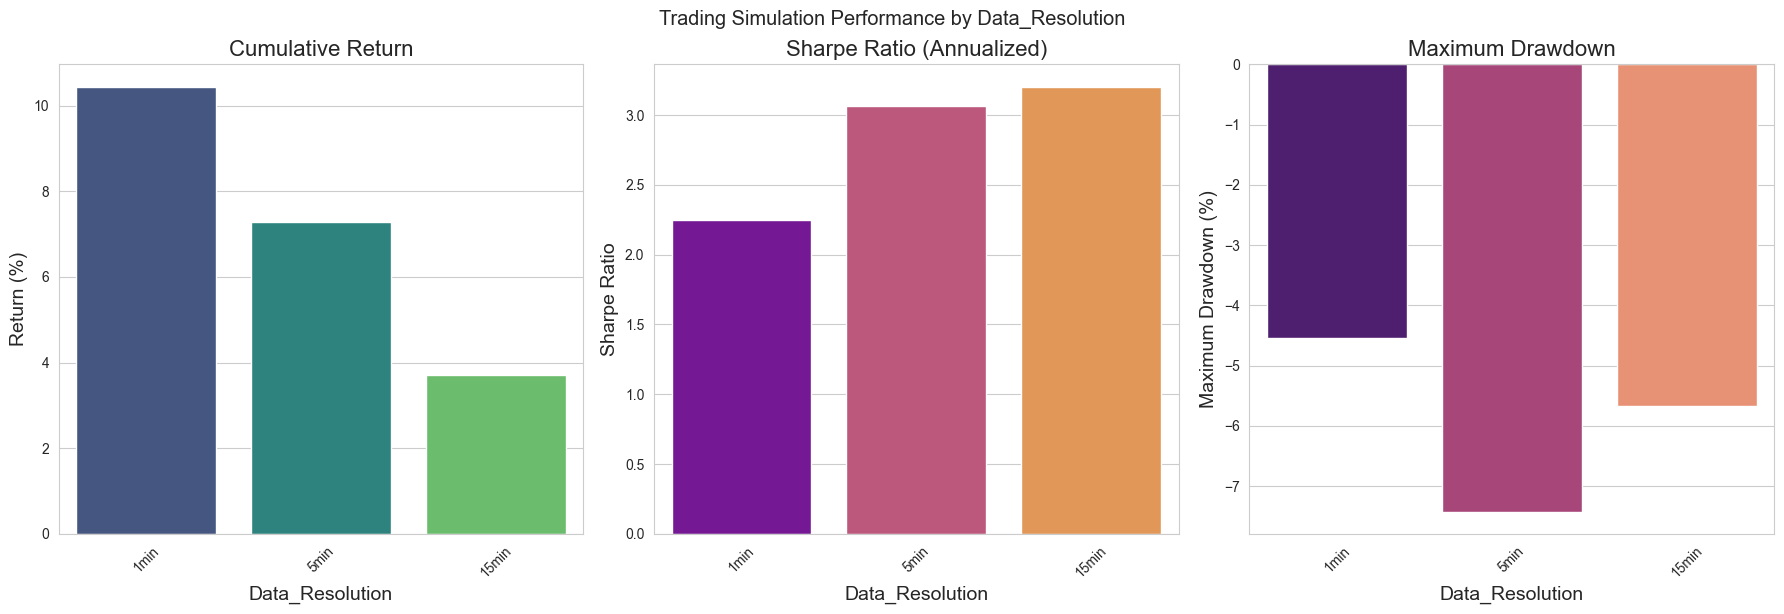

Trading Performance Comparison plot generated.

--- Cell 3: Computational Efficiency Comparison: Training Time vs. Inference Time ---


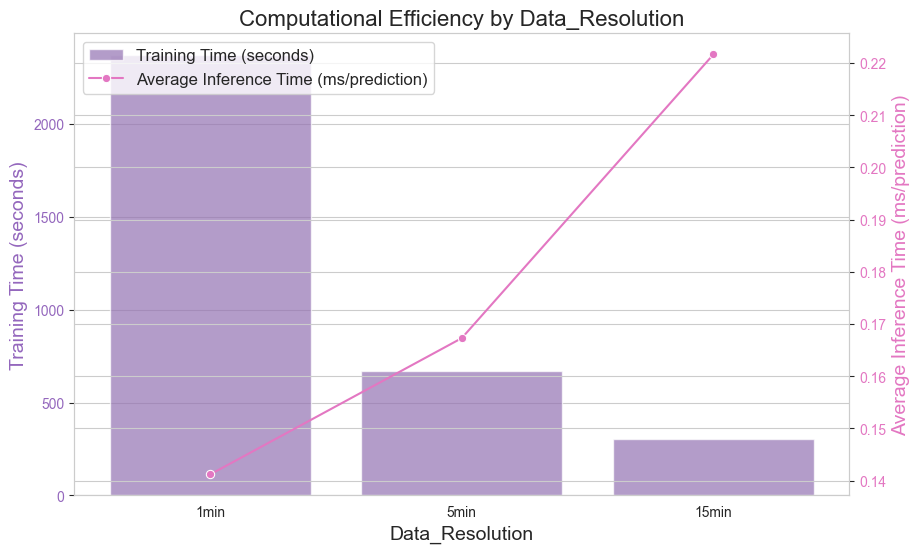

Computational Efficiency Comparison plot generated.

--- Cell 4: Scatter Plot for Multi-dimensional Comparison (e.g., Accuracy vs. Return) ---


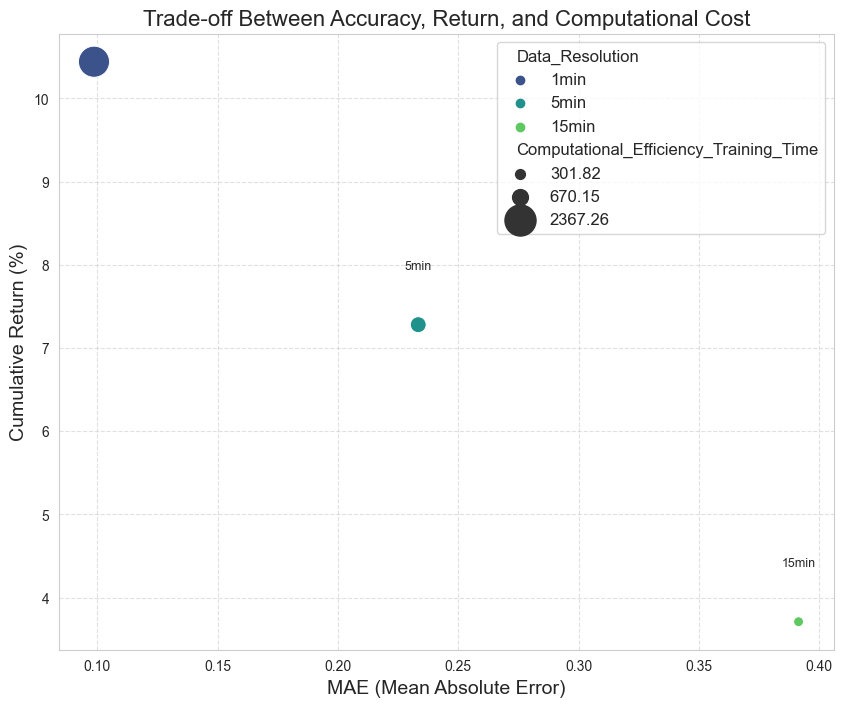

Scatter Plot generated.

--- Cell 5: Heatmap of Selected Metrics (for quick numerical comparison) ---


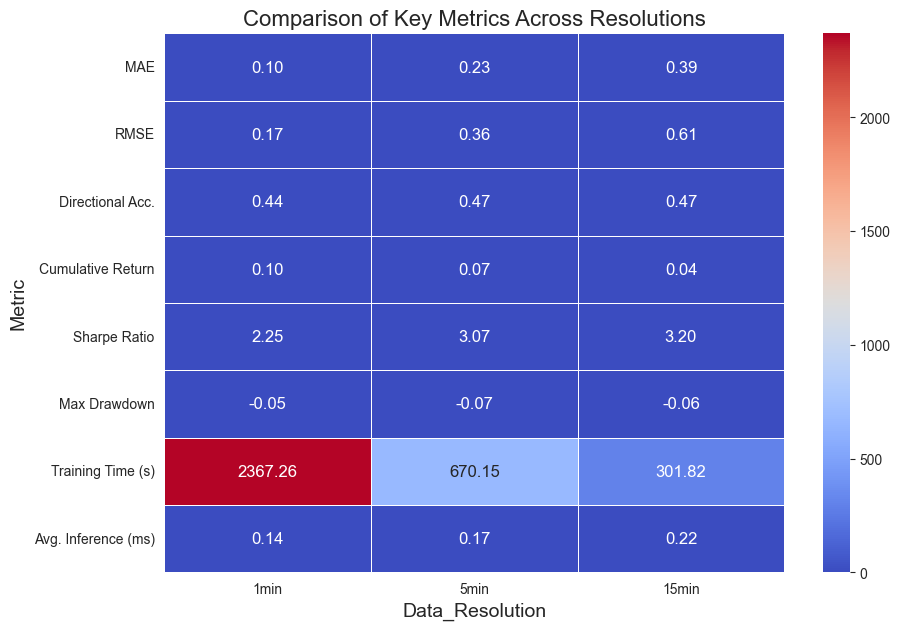

Heatmap of Selected Metrics generated.

--- Summary and Recommendations ---
## Key Findings:
- **Prediction Accuracy:** Note how MAE and RMSE change with Data_Resolution, and compare this to directional accuracy.
- **Trading Performance:** Analyze the relationship between cumulative return, Sharpe ratio (a risk-adjusted return measure), and maximum drawdown. Does higher resolution lead to better returns but with higher risk?
- **Computational Efficiency:** Compare the longer training times for finer resolutions against relatively fast inference times.

## Points for Consideration:
1. Which Data_Resolution offers the best balance between accuracy, return, and computational cost for your objectives?
2. Are there clear trade-offs? For example, does better prediction accuracy necessarily lead to better trading returns?
3. What are the implications of these findings for model selection and deployment in a real-world environment?

## Ideas for Further Analysis:
1. **Interactive Graphs:** Use

In [48]:

# Set a nice style for the plots
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12

# --- Cell 1: Prediction Accuracy vs. Data_Resolution ---
print("--- Cell 1: Prediction Accuracy vs. Data_Resolution ---")

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x='Data_Resolution', y='Prediction_Accuracy_MAE', data=df, marker='o', label='MAE', ax=ax1, color='tab:blue')
sns.lineplot(x='Data_Resolution', y='Prediction_Accuracy_RMSE', data=df, marker='o', label='RMSE', ax=ax1, color='tab:orange')
ax1.set_xlabel('Data_Resolution')
ax1.set_ylabel('Error (MAE/RMSE)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Prediction Accuracy Performance by Data_Resolution')

# Y2-axis for Directional Accuracy
ax2 = ax1.twinx()
sns.lineplot(x='Data_Resolution', y=(df['Prediction_Accuracy_Directional_Accuracy'] * 100), data=df, marker='s', label='Directional Accuracy', ax=ax2, color='tab:green', linestyle='--')
ax2.set_ylabel('Directional Accuracy (%)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.set_ylim(0, 100) # Accuracy percentages from 0 to 100

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()
print("Prediction Accuracy vs. Data_Resolution plot generated.")

# --- Cell 2: Trading Performance Comparison: Return, Sharpe Ratio, and Max Drawdown ---
print("\n--- Cell 2: Trading Performance Comparison: Return, Sharpe Ratio, and Max Drawdown ---")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True) # sharex=True so that the X-axis is identical

# Cumulative Return
cumulative_return = df['Trading_Simulation_Cumulative_Return'] * 100
sns.barplot(x=df['Data_Resolution'], y=cumulative_return, ax=axes[0], palette='viridis')
axes[0].set_title('Cumulative Return')
axes[0].set_ylabel('Return (%)')
axes[0].tick_params(axis='x', rotation=45) # Rotate X labels if they are long

# Sharpe Ratio
sharpe_ratio = df['Trading_Simulation_Sharpe_Ratio_(Annualized)']
sns.barplot(x=df['Data_Resolution'], y=sharpe_ratio, ax=axes[1], palette='plasma')
axes[1].set_title('Sharpe Ratio (Annualized)')
axes[1].set_ylabel('Sharpe Ratio')
axes[1].tick_params(axis='x', rotation=45)

# Maximum Drawdown
max_drawdown = df['Trading_Simulation_Maximum_Drawdown'] * 100
sns.barplot(x=df['Data_Resolution'], y=max_drawdown, ax=axes[2], palette='magma')
axes[2].set_title('Maximum Drawdown')
axes[2].set_ylabel('Maximum Drawdown (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Trading Simulation Performance by Data_Resolution', y=1.02) # Super title for all sub-plots
plt.show()
print("Trading Performance Comparison plot generated.")

# --- Cell 3: Computational Efficiency Comparison: Training Time vs. Inference Time ---
print("\n--- Cell 3: Computational Efficiency Comparison: Training Time vs. Inference Time ---")

fig, ax1 = plt.subplots(figsize=(10, 6))

# Y1-axis for Training Time
sns.barplot(x='Data_Resolution', y='Computational_Efficiency_Training_Time', data=df, ax=ax1, color='tab:purple', alpha=0.7, label='Training Time (seconds)')
ax1.set_xlabel('Data_Resolution')
ax1.set_ylabel('Training Time (seconds)', color='tab:purple')
ax1.tick_params(axis='y', labelcolor='tab:purple')
ax1.set_title('Computational Efficiency by Data_Resolution')

# Y2-axis for Inference Time
ax2 = ax1.twinx()
sns.lineplot(x='Data_Resolution', y='Computational_Efficiency_Average_Inference_Time', data=df, ax=ax2, marker='o', color='tab:pink', label='Average Inference Time (ms/prediction)')
ax2.set_ylabel('Average Inference Time (ms/prediction)', color='tab:pink')
ax2.tick_params(axis='y', labelcolor='tab:pink')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
print("Computational Efficiency Comparison plot generated.")

# --- Cell 4: Scatter Plot for Multi-dimensional Comparison (e.g., Accuracy vs. Return) ---
print("\n--- Cell 4: Scatter Plot for Multi-dimensional Comparison (e.g., Accuracy vs. Return) ---")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df['Prediction_Accuracy_MAE'],          # Dimension 1: Lower error = better
    y=df['Trading_Simulation_Cumulative_Return'] * 100, # Dimension 2: Higher return = better
    hue=df['Data_Resolution'],              # Dimension 3: Color by resolution
    size=df['Computational_Efficiency_Training_Time'], # Dimension 4: Point size by training time (shorter time = better)
    sizes=(50, 500), # Scale for point sizes
    legend='full',
    palette='viridis'
)
plt.title('Trade-off Between Accuracy, Return, and Computational Cost')
plt.xlabel('MAE (Mean Absolute Error)')
plt.ylabel('Cumulative Return (%)')
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotations to points to indicate Data_Resolution
for i, row in df.iterrows():
    plt.annotate(row['Data_Resolution'], (row['Prediction_Accuracy_MAE'], row['Trading_Simulation_Cumulative_Return'] * 100 + 0.5),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.show()
print("Scatter Plot generated.")

# --- Cell 5: Heatmap of Selected Metrics (for quick numerical comparison) ---
print("\n--- Cell 5: Heatmap of Selected Metrics (for quick numerical comparison) ---")

# Select critical metrics and create a new DataFrame for the heatmap
heatmap_df = df_indexed[[
    'Prediction_Accuracy_MAE',
    'Prediction_Accuracy_RMSE',
    'Prediction_Accuracy_Directional_Accuracy',
    'Trading_Simulation_Cumulative_Return',
    'Trading_Simulation_Sharpe_Ratio_(Annualized)',
    'Trading_Simulation_Maximum_Drawdown',
    'Computational_Efficiency_Training_Time',
    'Computational_Efficiency_Average_Inference_Time'
]].copy()

# Rename columns for better readability
heatmap_df.columns = [
    'MAE', 'RMSE', 'Directional Acc.', 'Cumulative Return',
    'Sharpe Ratio', 'Max Drawdown', 'Training Time (s)', 'Avg. Inference (ms)'
]

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_df.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Comparison of Key Metrics Across Resolutions')
plt.xlabel('Data_Resolution')
plt.ylabel('Metric')
plt.yticks(rotation=0) # Ensure Y-labels are not rotated
plt.show()
print("Heatmap of Selected Metrics generated.")

print("\n--- Summary and Recommendations ---")
print("## Key Findings:")
print("- **Prediction Accuracy:** Note how MAE and RMSE change with Data_Resolution, and compare this to directional accuracy.")
print("- **Trading Performance:** Analyze the relationship between cumulative return, Sharpe ratio (a risk-adjusted return measure), and maximum drawdown. Does higher resolution lead to better returns but with higher risk?")
print("- **Computational Efficiency:** Compare the longer training times for finer resolutions against relatively fast inference times.")

print("\n## Points for Consideration:")
print("1. Which Data_Resolution offers the best balance between accuracy, return, and computational cost for your objectives?")
print("2. Are there clear trade-offs? For example, does better prediction accuracy necessarily lead to better trading returns?")
print("3. What are the implications of these findings for model selection and deployment in a real-world environment?")

print("\n## Ideas for Further Analysis:")
print("1. **Interactive Graphs:** Use libraries like Plotly or Bokeh to create graphs that allow zooming, hovering, and displaying additional details.")
print("2. **Ratio Presentation:** Calculate and display ratios between metrics, for example: 'Return per Training Time'.")
print("3. **Normalization Comparison:** If you have many metrics with very different scales, normalize them to a common range (e.g., 0-1) and display them together.")